In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [ ]:
T = 2
w = 2*np.pi/T
a = -1
b = 1
p = 1.64


In [37]:
def s(h):
  return p*h**2

def f0(h):
  return s(h)

def f1(h):
  return s(h) * np.cos(w*h)

def f2(h):
  return s(h) * np.cos(w*2*h)


a0 = quad(f0,a,b)[0]
a1 = quad(f1,a,b)[0]
a2 = quad(f2,a,b)[0]


a0= 1/T * a0
a1 = 2/T * a1
a2 = 2/T * a2

def cal(h):
  return a0+ a1 * np.cos(h*w) + a2*np.cos(2*h*w)


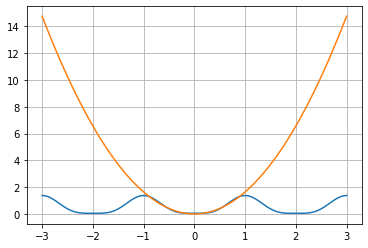

In [44]:
h = np.linspace(-3,3, 100)
fig, ax = plt.subplots()
ax.plot(h,cal(h))
ax.plot(h,p*h**2)
ax.grid(True)
plt.show()

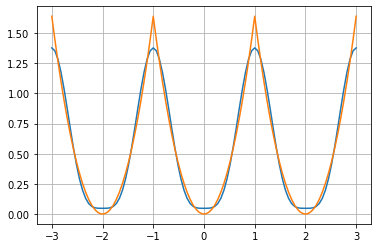

In [46]:
h = np.linspace(-3,3, 100)
fig, ax = plt.subplots()
ax.plot(h,cal(h))
def cd(a, b):
    interval = b - a
    return lambda f: lambda x: f((x - a) % interval + a)

@cd(-1, 1)
def f(h):
    return p*h**2 


ax.plot(h,f(h))

ax.grid(True)

plt.show()

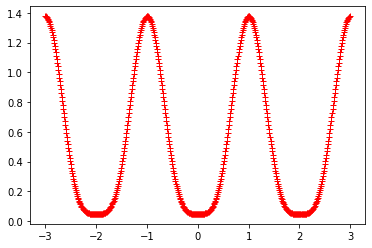

In [47]:
n = 2

def s(t):
  return p*t**2

A = [0 for k in range(3)]
A[0] = 1/T * quad(f0,a,b)[0]
for k in range(1,n+1):
  A[k]=2/T * quad(lambda t: s(t) * np.cos(w*k*t),a,b)[0]
sum=A[0]
x=np.arange(-3,3,0.01)
for k in range(1,3):
  sum+=A[k]*np.cos(k*x*w)

plt.plot(x,sum,'+r')
